# Zadanie 1

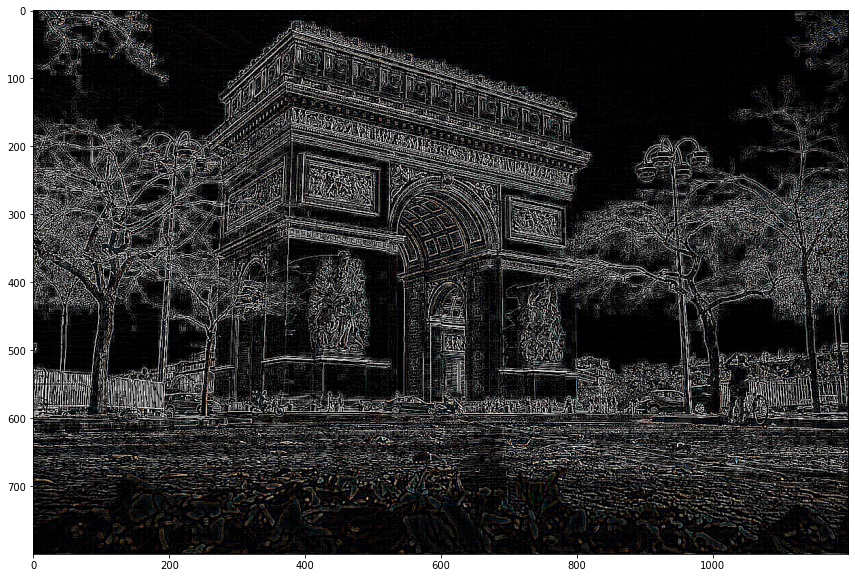

In [39]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Ustawienie rozmarów wyświetlanych obrazów
plt.rcParams["figure.figsize"] = (18, 10)

image = cv.imread("images/example.jpg")


kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]

kernel = np.asarray(kernel)
filtered_image = cv.filter2D(image, -1, kernel=kernel) 

image = cv.imread("images/example.jpg")

plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))


# Zadanie 2

(800, 1200, 3)
[0.25390625 0.47265625 0.5703125 ]
[0.5710469  0.51008594 0.39617187]


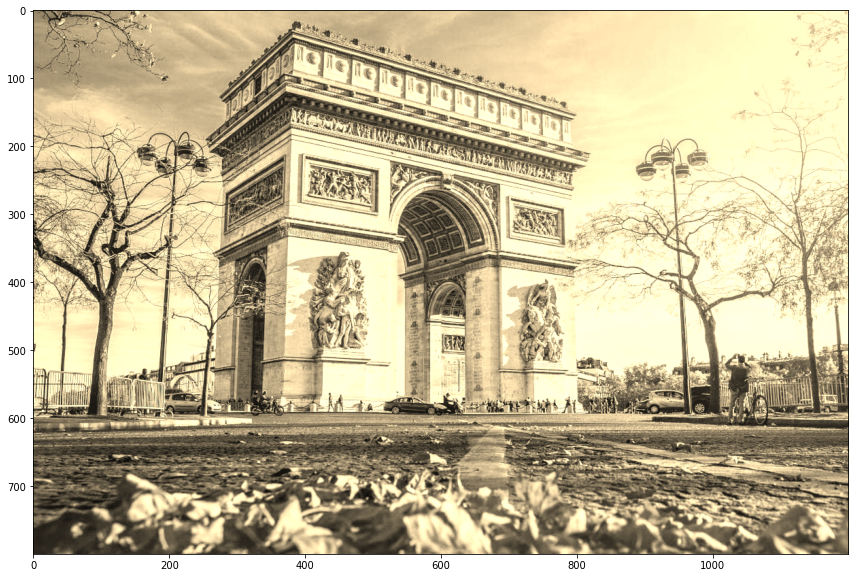

In [47]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Ustawienie rozmarów wyświetlanych obrazów
plt.rcParams["figure.figsize"] = (18, 10)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = np.float32(image)
image = image/256

color_matrix = [
    [0.393, 0.769, 0.189], # R
    [0.349, 0.689, 0.168], # G
    [0.272, 0.534, 0.131] # B
]

print(image.shape)
print(image[0, 0, :])
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        image[x, y, :] = np.dot(color_matrix, image[x, y, :])
        for c in range(image.shape[2]):
            if image[x, y, c] > 1.0:
                image[x, y, c] = 1.0
print(image[0, 0, :])

plt.imshow(image)
            

# Zadanie 3

(800, 1200, 3)
[ 65 121 146]
[ 65 121 146]


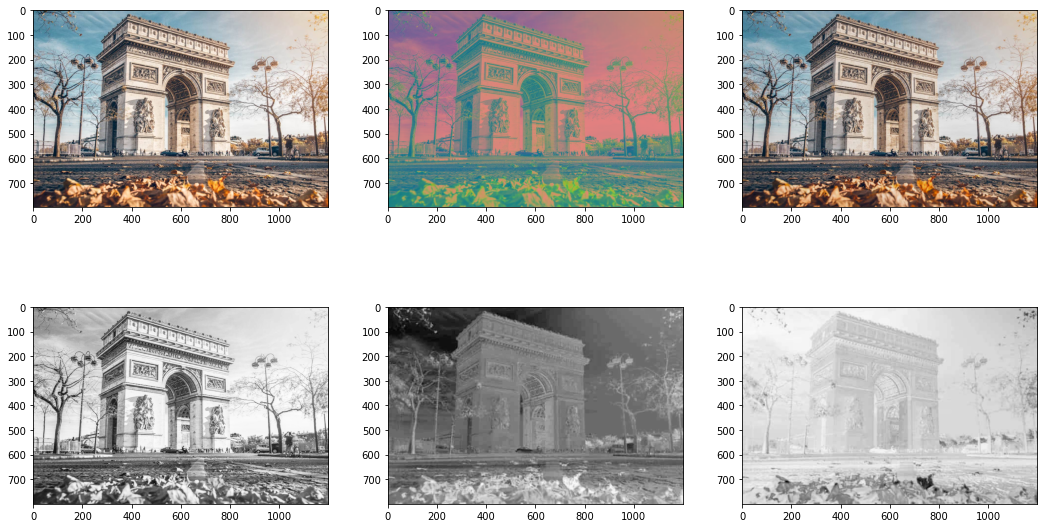

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Ustawienie rozmarów wyświetlanych obrazów
plt.rcParams["figure.figsize"] = (18, 10)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

color_matrix = [
    [0.229, 0.587, 0.114], # R
    [0.500, -0.418, -0.082], # G
    [-0.168, -0.331, 0.500] # B
]

imageYCrCb = image.copy()

print(image.shape)
print(image[0, 0, :])
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        imageYCrCb[x, y, :] = np.dot(color_matrix, image[x, y, :])
        imageYCrCb[x, y, 1] += 128
        imageYCrCb[x, y, 2] += 128

print(image[0, 0, :])

imageRGB = cv.cvtColor(imageYCrCb, cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(2, 3)

ax[0, 0].imshow(image)
ax[0, 1].imshow(imageYCrCb)
ax[0, 2].imshow(imageRGB)

ax[1, 0].imshow(imageYCrCb[:, :, 0], cmap="Greys_r")
ax[1, 1].imshow(imageYCrCb[:, :, 1], cmap="Greys_r")
ax[1, 2].imshow(imageYCrCb[:, :, 2], cmap="Greys_r")

# Zadanie 4

(800, 1200, 3)
downsampledCb: 400


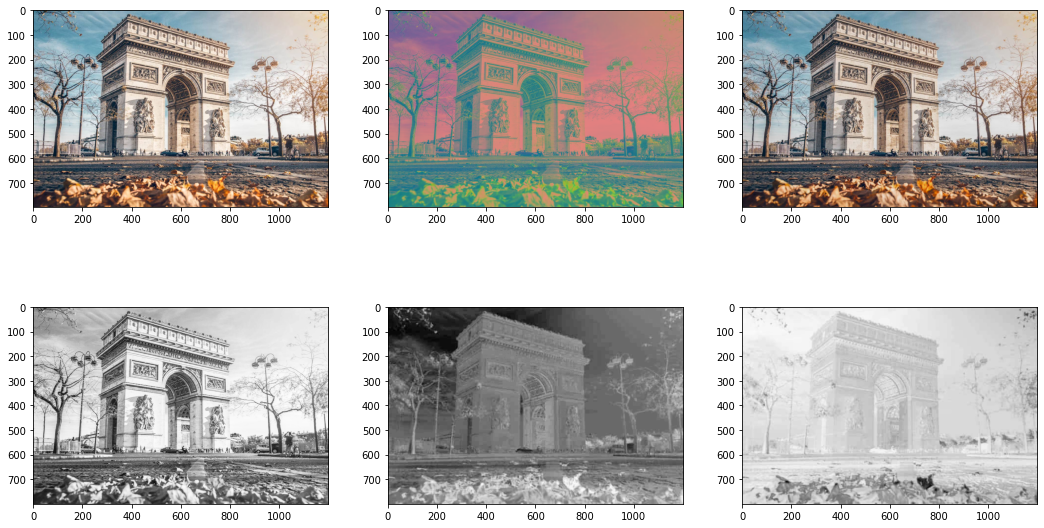

In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Ustawienie rozmarów wyświetlanych obrazów
plt.rcParams["figure.figsize"] = (18, 10)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

color_matrix = [
    [0.229, 0.587, 0.114], # R
    [0.500, -0.418, -0.082], # G
    [-0.168, -0.331, 0.500] # B
]

imageYCrCb = image.copy()

for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        imageYCrCb[x, y, :] = np.dot(color_matrix, image[x, y, :])
        imageYCrCb[x, y, 1] += 128
        imageYCrCb[x, y, 2] += 128

print(image.shape)

downsampledCb = np.zeros((int(imageYCrCb.shape[0]/2), int(imageYCrCb.shape[1]/2)))
downsampledCr = np.zeros((int(imageYCrCb.shape[0]/2), int(imageYCrCb.shape[1]/2)))

print("downsampledCb: " + str(len(downsampledCb)))

# downsampling
for x in range(0, imageYCrCb.shape[0], 2):
    for y in range(0, imageYCrCb.shape[1], 2):
        downsampledCb[int(x/2)][int(y/2)] = imageYCrCb[x, y, 1]
        downsampledCr[int(x/2)][int(y/2)] = imageYCrCb[x, y, 2]


upsampledYCrCb = image.copy()

#upsampling
for x in range(int(imageYCrCb.shape[0]/2)):
    for y in range(int(imageYCrCb.shape[1]/2)):
        upsampledYCrCb[x*2, y*2, 0] = imageYCrCb[x*2, y*2, 0]
        upsampledYCrCb[x*2 + 1, y*2, 0]= imageYCrCb[x*2 + 1, y*2, 0]
        upsampledYCrCb[x*2, y*2 + 1, 0] = imageYCrCb[x*2, y*2 + 1, 0]
        upsampledYCrCb[x*2 + 1, y*2 + 1, 0] = imageYCrCb[x*2 + 1, y*2 + 1, 0]

        upsampledYCrCb[x*2, y*2, 1] = downsampledCb[x, y]
        upsampledYCrCb[x*2 + 1, y*2, 1] = downsampledCb[x, y]
        upsampledYCrCb[x*2, y*2 + 1, 1] = downsampledCb[x, y]
        upsampledYCrCb[x*2 + 1, y*2 + 1, 1]  = downsampledCb[x, y]

        upsampledYCrCb[x*2, y*2, 2] = downsampledCr[x, y]
        upsampledYCrCb[x*2 + 1, y*2, 2] = downsampledCr[x, y]
        upsampledYCrCb[x*2, y*2 + 1, 2] = downsampledCr[x, y]
        upsampledYCrCb[x*2 + 1, y*2 + 1, 2] = downsampledCr[x, y]


upsampledRGB = cv.cvtColor(upsampledYCrCb, cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(2, 3)


ax[0, 0].imshow(image)
ax[0, 1].imshow(imageYCrCb)
ax[0, 2].imshow(upsampledRGB)

ax[1, 0].imshow(upsampledYCrCb[:, :, 0], cmap="Greys_r")
ax[1, 1].imshow(upsampledYCrCb[:, :, 1], cmap="Greys_r")
ax[1, 2].imshow(upsampledYCrCb[:, :, 2], cmap="Greys_r")


# Zadanie 5

(800, 1200, 3)
downsampledCb: 400
Error : 155.40807152777776


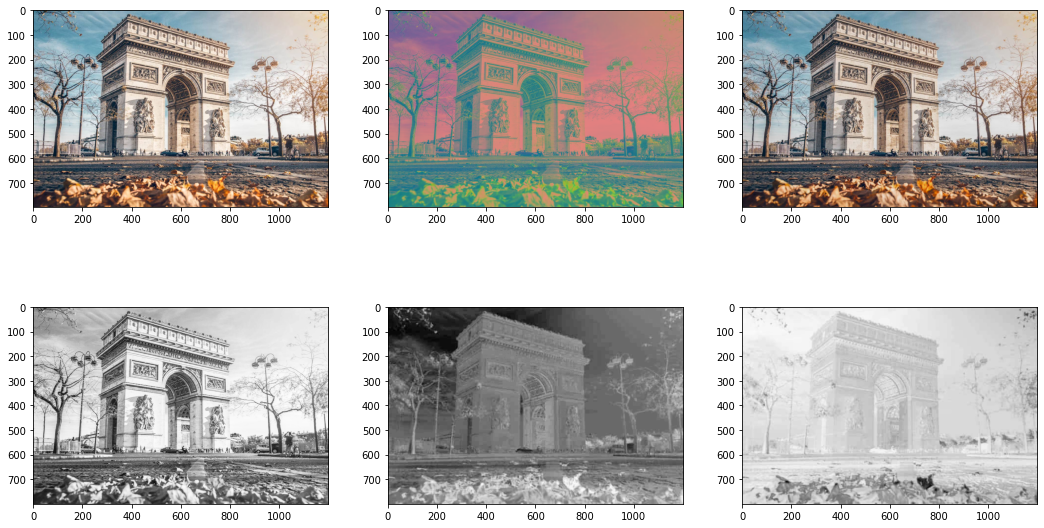

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Ustawienie rozmarów wyświetlanych obrazów
plt.rcParams["figure.figsize"] = (18, 10)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

color_matrix = [
    [0.229, 0.587, 0.114], # R
    [0.500, -0.418, -0.082], # G
    [-0.168, -0.331, 0.500] # B
]

imageYCrCb = image.copy()

for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        imageYCrCb[x, y, :] = np.dot(color_matrix, image[x, y, :])
        imageYCrCb[x, y, 1] += 128
        imageYCrCb[x, y, 2] += 128

print(image.shape)

downsampledCb = np.zeros((int(imageYCrCb.shape[0]/2), int(imageYCrCb.shape[1]/2)))
downsampledCr = np.zeros((int(imageYCrCb.shape[0]/2), int(imageYCrCb.shape[1]/2)))

print("downsampledCb: " + str(len(downsampledCb)))

# downsampling
for x in range(0, imageYCrCb.shape[0], 2):
    for y in range(0, imageYCrCb.shape[1], 2):
        downsampledCb[int(x/2)][int(y/2)] = imageYCrCb[x, y, 1]
        downsampledCr[int(x/2)][int(y/2)] = imageYCrCb[x, y, 2]


upsampledYCrCb = image.copy()

#upsampling
for x in range(int(imageYCrCb.shape[0]/2)):
    for y in range(int(imageYCrCb.shape[1]/2)):
        upsampledYCrCb[x*2, y*2, 0] = imageYCrCb[x*2, y*2, 0]
        upsampledYCrCb[x*2 + 1, y*2, 0]= imageYCrCb[x*2 + 1, y*2, 0]
        upsampledYCrCb[x*2, y*2 + 1, 0] = imageYCrCb[x*2, y*2 + 1, 0]
        upsampledYCrCb[x*2 + 1, y*2 + 1, 0] = imageYCrCb[x*2 + 1, y*2 + 1, 0]

        upsampledYCrCb[x*2, y*2, 1] = downsampledCb[x, y]
        upsampledYCrCb[x*2 + 1, y*2, 1] = downsampledCb[x, y]
        upsampledYCrCb[x*2, y*2 + 1, 1] = downsampledCb[x, y]
        upsampledYCrCb[x*2 + 1, y*2 + 1, 1]  = downsampledCb[x, y]

        upsampledYCrCb[x*2, y*2, 2] = downsampledCr[x, y]
        upsampledYCrCb[x*2 + 1, y*2, 2] = downsampledCr[x, y]
        upsampledYCrCb[x*2, y*2 + 1, 2] = downsampledCr[x, y]
        upsampledYCrCb[x*2 + 1, y*2 + 1, 2] = downsampledCr[x, y]


upsampledRGB = cv.cvtColor(upsampledYCrCb, cv.COLOR_YCrCb2RGB)

sum = 0.0
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        for c in range(3):
            sum += (int(image[x][y][c]) - int(upsampledRGB[x][y][c])) ** 2

error = sum / (image.shape[0] * image.shape[1] * 3)
print(f"Error : {error}")

fig, ax = plt.subplots(2, 3)


ax[0, 0].imshow(image)
ax[0, 1].imshow(imageYCrCb)
ax[0, 2].imshow(upsampledRGB)

ax[1, 0].imshow(upsampledYCrCb[:, :, 0], cmap="Greys_r")
ax[1, 1].imshow(upsampledYCrCb[:, :, 1], cmap="Greys_r")
ax[1, 2].imshow(upsampledYCrCb[:, :, 2], cmap="Greys_r")
